In [2]:
from mcm import EcModel
import importlib
import numpy as np

reference= 'notebook'
composition = 'hacker_2015_md_xenolith'
rxnName = 'eclogitization_agu14_stx21_rx'

In [3]:
mod = importlib.import_module("compositions."+composition)
Cik0, Xik0, mi0, phii0, phase_names, endmember_names = [getattr(mod,a,None) for a in ['Cik0', 'Xik0', 'mi0','phii0', 'phase_names', 'endmember_names']]

rxn = EcModel.get_reaction(rxnName)

def x2c(rxn, Xik0):
    return np.asarray([c for (i, ph) in enumerate(rxn.phases()) for c in ph.x_to_c(Xik0[i])])
def phi2m(rxn, phii0, Cik0, T=900.,p=10000.):
    '''Converts phase modes in volume fraction to mass fraction given an intial EM composition in mass fractions.'''    

    densities = []
    C = rxn.zero_C()
    Ki = 0
    for i,ph in enumerate(rxn.phases()):
        n = len(ph.endmembers())
        C[i] = Cik0[Ki:Ki+n]
        Ki = Ki+n

    C = [np.maximum(np.asarray(C[i]), eps*np.ones(len(C[i]))) for i in range(len(C))]
    C = [np.asarray(C[i])/sum(C[i]) for i in range(len(C))]

    densities = [ph.rho(T, p, C[i]) for i,ph in enumerate(rxn.phases())]
    mass = np.sum(np.asarray(densities) * np.asarray(phii0))
    mi0 = np.asarray([v*densities[i]/mass for (i, v) in enumerate(phii0)])

    return mi0

Cik0 = x2c(rxn, Xik0) if Cik0 is None else Cik0
mi0 = phi2m(rxn, phii0, Cik0) if mi0 is None else mi0

[ 0.00881995 -0.00410924 -0.01875529 -0.03816635  0.07813897 -0.03281701
 -0.47811415  0.03599197 -0.05173588  0.21407369 -1.37878129 -0.10136522
  0.07176152  0.60403269  0.80264579  0.          0.          0.28837987]


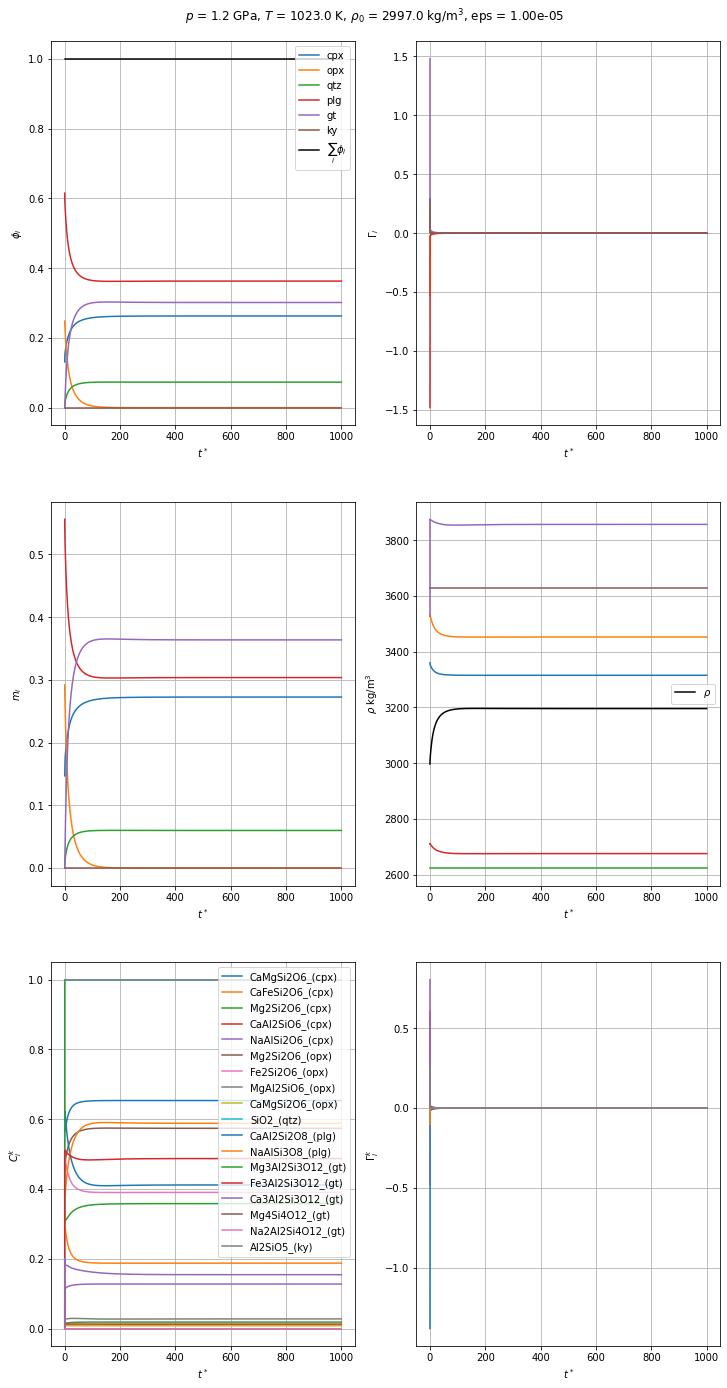

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Wt% (initial),0.14700,2.920000e-01,0.005000,0.556000,0.00000,0.000000e+00
Wt% (final),0.27263,2.507296e-12,0.059967,0.303683,0.36372,2.961321e-08


[2.72630366e-01 2.50729580e-12 5.99669762e-02 3.03682675e-01
 3.63719953e-01 2.96132078e-08]
[-3.75333732e-02 -4.19611755e-03  2.18746819e-13  8.01881909e-02
  6.26602117e-02 -4.46897795e-13 -1.62879039e-13  1.31185145e-13
  2.92550734e-02  4.95807937e-02 -1.94762547e-01 -8.12855165e-02
  5.13692617e-03  2.80624388e-03  5.81940793e-02  0.00000000e+00
  0.00000000e+00  2.99560354e-02]


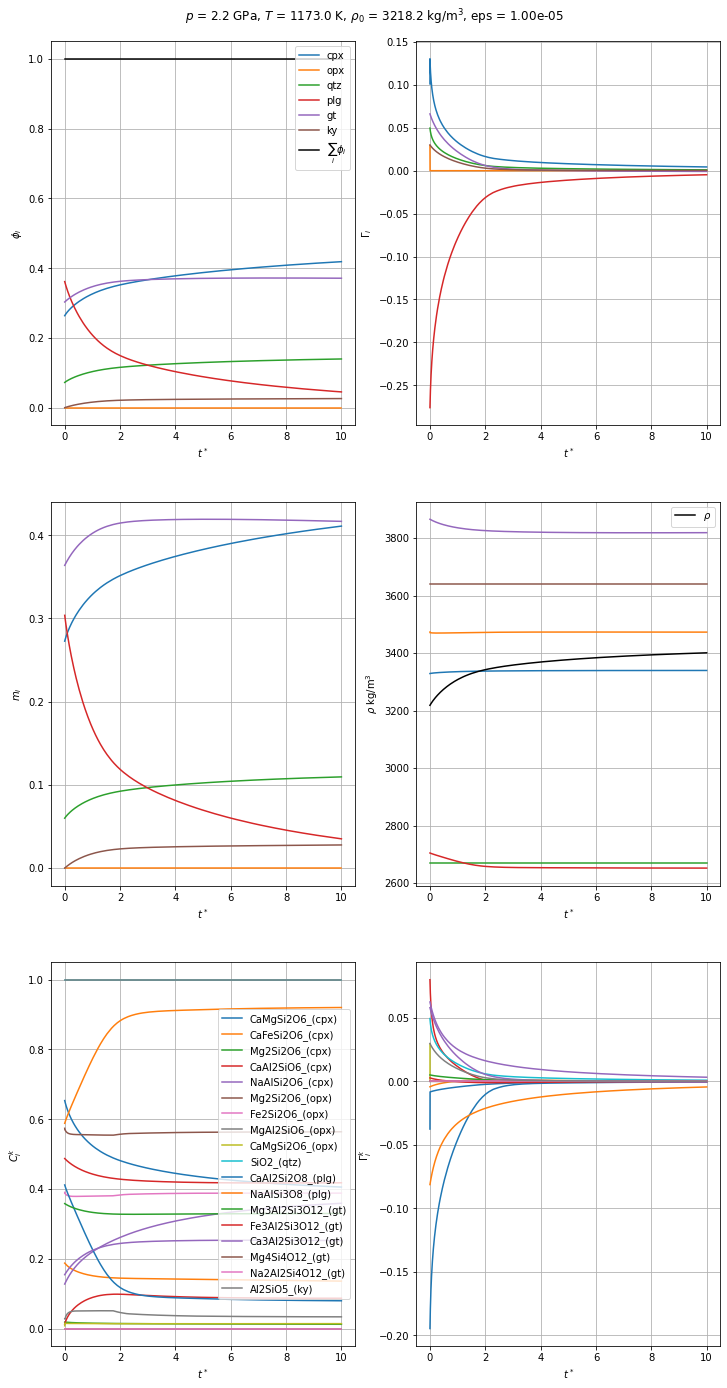

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Wt% (initial),0.272630,2.507296e-12,0.059967,0.303683,0.363720,2.961321e-08
Wt% (final),0.410877,-9.386726e-09,0.109577,0.035156,0.416585,2.780518e-02


(<py_eclogitization_agu14_stx21_rx.eclogitization_agu14_stx21_rx at 0x7f5834815d30>,
 None,
 None)

In [22]:
model = EcModel(
    reference,
    rxnName,
    mi0=mi0,
    Cik0=Cik0,
    P0=1.2,
    T0=750.+273.,
    nP=0,
    nT=0
)

model.run(reload=False,save=False,end_t=1000,eps=1.e-5)
mi1 = model.ode.sol.y[:model.ode.I, -1]
Cik1 = model.ode.sol.y[model.ode.I:model.ode.I+model.ode.K, -1]

model = EcModel(
    reference,
    rxnName,
    mi0=mi1,
    Cik0=Cik1,
    P0=2.2,
    T0=900. +273.,
    nP=0,
    nT=0
)
model.run(reload=False,save=False,end_t=10,eps=1.e-5)


In [21]:
nu = model.rxn.nu()
print(nu)
print(model.ode.final_rho())
model.rxn.report()

[[[0.6666666666666666, -0.6666666666666666, 0.0, 0.0, 0.0], [-0.3333333333333333, 0.3333333333333333, 0.0, 0.0], [0.0], [0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0], [0.6, -0.6, 0.0, 0.0], [0.0], [0.0, 0.0], [-0.4, 0.4, 0.0, 0.0, 0.0], [0.0]], [[0.75, -0.75, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0], [0.0, 0.0], [-0.25, 0.25, 0.0, 0.0, 0.0], [0.0]], [[0.0, 0.0, 1.0, 0.0, 0.0], [-1.0, 0.0, 0.0, 0.0], [0.0], [0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0]], [[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -1.0], [0.0], [0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0]], [[0.0, 0.0, 0.0, -0.75, 0.0], [0.0, 0.0, 0.75, 0.0], [0.0], [0.0, 0.0], [-0.25, 0.0, 0.25, 0.0, 0.0], [0.0]], [[0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0], [1.0], [-1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0]], [[0.5, 0.0, 0.0, 0.0, 0.0], [-0.5, 0.0, 0.5, 0.0], [0.5], [-0.5, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0]], [[0.3333333333333333, 0.0, 0.0, 0.0, 0.0], [-0.6666666666666666, 0.0, 0.0, 0.0], [0.33

In [ ]:
model = EcModel(
    reference,
    "eclogitization_agu5_stx21_rx",
    domain="profile",
    mi0=mi0,
    Xik0=Xik0,
    P0=0.5,
    T0=1273,
    Pmin=0.5,
    Pmax=2.5,
    Tmin=1273,
    Tmax=773,
    nP=50,
    nT=50
)

model.run(reload=False,save=False,plot=True,end_t=1e3,eps=1.e-3)

In [ ]:
import matplotlib.pyplot as plt
model.bdfdiag.plot_modes_of_all_phases()
plt.ylim([0.005, 0.615])
plt.xlim([773,1273])
plt.xticks([873, 973, 1073, 1173, 1273])
plt.yticks([0.005,0.123,0.246,0.369,0.492,0.615])
plt.show()